# Predicting COVID-19 Hospitalizations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import filterpy
from pandas import DataFrame
from filterpy.kalman import KalmanFilter

Text(0.5, 0, 'Days')

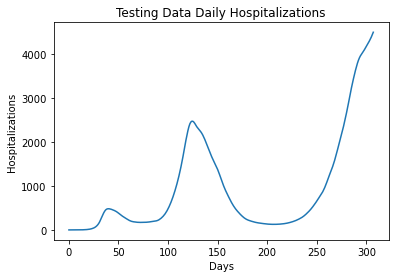

In [2]:
# Testing Data from RTEM Simulation
cols = ['Total_Daily_Hos']
RTEM_df = pd.read_csv('TestingData.csv',names = cols)
RTEM_df
Daily_Hos = RTEM_df['Total_Daily_Hos']
Time = range(0,308)

plt.plot(Time,Daily_Hos)
plt.title('Testing Data Daily Hospitalizations')
plt.ylabel('Hospitalizations')
plt.xlabel('Days')

In [3]:
AZ_df = pd.read_csv('arizona-history.csv')
# No Hos Data
CA_df = pd.read_csv('california-history.csv')
CO_df = pd.read_csv('colorado-history.csv')
#No Hos Data
FL_df = pd.read_csv('florida-history.csv')
# No Hos Data
IL_df = pd.read_csv('illinois-history.csv')
NM_df = pd.read_csv('new-mexico-history.csv')
# No Hos Data
NY_df = pd.read_csv('new-york-history.csv')
# No Hos Data
TX_df = pd.read_csv('texas-history.csv')
VA_df = pd.read_csv('virginia-history.csv')
WA_df = pd.read_csv('washington-history.csv')



In [4]:
def dt_function(df):
    
    df['date'] = pd.to_datetime(df['date'])
    col_list = ['date', 'hospitalizedIncrease']
    df = df[col_list]
    df['hospitalizedIncrease'] = np.abs(df['hospitalizedIncrease'])
    df = df.sort_values('date')
    return df

In [5]:
AZ_df= dt_function(AZ_df)
CA_df = dt_function(CA_df)
CO_df=dt_function(CO_df)
FL_df=dt_function(FL_df)
IL_df=dt_function(IL_df)
NM_df=dt_function(NM_df)
NY_df=dt_function(NY_df)
TX_df=dt_function(TX_df)
VA_df=dt_function(VA_df)
WA_df=dt_function(WA_df)

<ipython-input-4-d53a58811178>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hospitalizedIncrease'] = np.abs(df['hospitalizedIncrease'])


In [6]:
# clist = []
# def cleaning_f(Series):    
#     for element in Series:
#         if element > 0:
#             clist.append(element)
#         else:
#             abs_element = np.abs(element)
#             clist.append(abs_element)
#     return pd.Series(clist)


In [7]:
def plot_f(df):    
    dates = df['date']
    daily_hos = df['hospitalizedIncrease']

    plt.plot(dates, daily_hos)
    plt.xlabel('Time')
    plt.ylabel('Daily Hospitalizations')

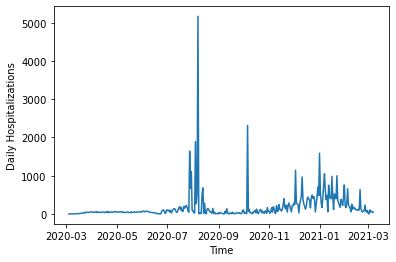

In [8]:
plot_f(AZ_df)

In [35]:
AZ_df['hospitalizedIncrease'].tail

<bound method NDFrame.tail of 368      0
367      1
366      1
365      0
364      0
      ... 
4      106
3       50
2       72
1       44
0       44
Name: hospitalizedIncrease, Length: 369, dtype: int64>

In [28]:
#plot_f(CO_df)

In [29]:
#plot_f(WA_df)

In [30]:
#plot_f(VA_df)

In [31]:
#plot_f(NM_df)

In [13]:
# Multi output time series
# Cross correlation output - links multiple responses

# ARIMA Forecasting
    
    p = number of lag observations included in the model (lag order)
    d = number of times that the raw observations are differences (degree of differencing)
    q = size of moving average window (order of moving average)

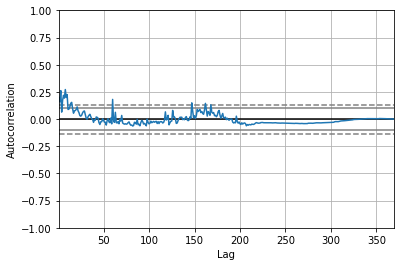

In [14]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA

autocorrelation_plot(AZ_df['hospitalizedIncrease'])
pyplot.show()

In [15]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)


In [16]:
# days_in_year = 365
# differenced = difference(AZ_df['hospitalizedIncrease'], days_in_year)

In [17]:
model = ARIMA(AZ_df['hospitalizedIncrease'], order = (50 , 1,0))
model_fit = model.fit()

print(model_fit.summary())

/Users/nickseah/Desktop/PythonAddOns/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/nickseah/Desktop/PythonAddOns/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/nickseah/Desktop/PythonAddOns/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                                SARIMAX Results                                 
Dep. Variable:     hospitalizedIncrease   No. Observations:                  369
Model:                  ARIMA(50, 1, 0)   Log Likelihood               -2657.898
Date:                  Fri, 02 Apr 2021   AIC                           5417.796
Time:                          17:40:34   BIC                           5617.108
Sample:                               0   HQIC                          5496.981
                                  - 369                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8996      0.062    -14.611      0.000      -1.020      -0.779
ar.L2         -0.8644      0.076    -11.395      0.000      -1.013      -0.716
ar.L3         -0.6477      0.088    

In [37]:
forecast = model_fit.forecast()
forecast

/Users/nickseah/Desktop/PythonAddOns/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


369    7.696382
dtype: float64

# Initial forecast of 8 Hospitalizations on day 369

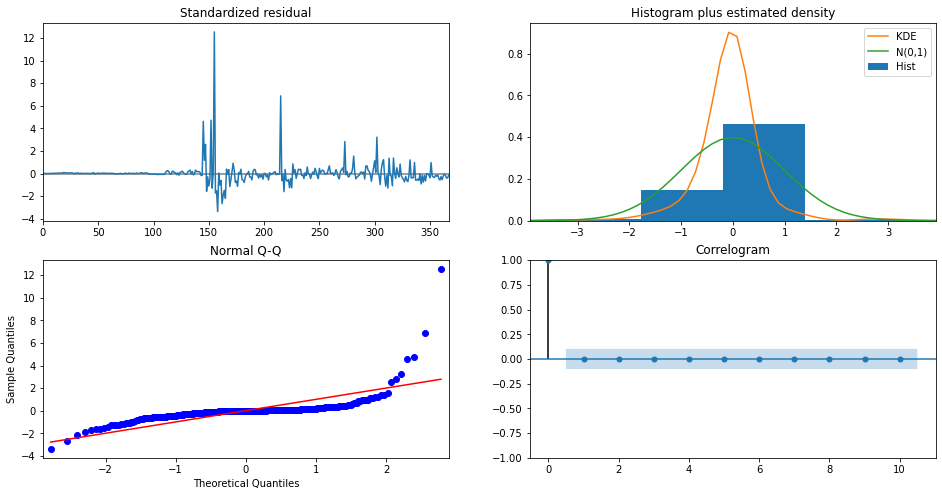

In [18]:
model_fit.plot_diagnostics(figsize = (16,8))
plt.show()

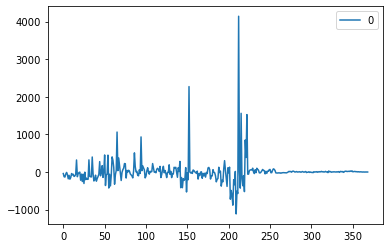

In [19]:
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

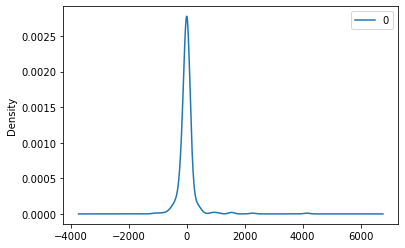

In [20]:
# Density plot of residuals
residuals.plot(kind = 'kde')
pyplot.show()

In [21]:
print(residuals.describe())

                 0
count   369.000000
mean      2.813277
std     330.287435
min   -1113.878275
25%     -58.330498
50%      -0.657829
75%      21.805437
max    4141.560004


# A non-zero mean in the residuals means that there is a bias in the prediction

In [22]:
# BFGS for parameter optimization

In [23]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# for t in range(len(test)):
#     model = ARIMA(history, order=(5,1,0))
#     model_fit = model.fit()
#     output = model_fit.forecast()
#     yhat = output[0]
#     predictions.append(yhat)
#     obs = test[t]
#     history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
# # evaluate forecasts
# rmse = sqrt(mean_squared_error(test, predictions))
# print('Test RMSE: %.3f' % rmse)
# # plot forecasts against actual outcomes
# pyplot.plot(test)
# pyplot.plot(predictions, color='red')
# pyplot.show()

<ipython-input-23-67d4982c2e20>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [25]:
forecast = model_fit.forecast()

/Users/nickseah/Desktop/PythonAddOns/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
